# Analysis Muons' Snapshots
In this notebook, we analyse the snapshot created from muons' simulations.
In particular, the snapshots have been created over a time window of `100ns` and `Dt=4ns`.

In [23]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [24]:
dirin = os.path.join("..", "..", "Development", "Out", "T10us", "Muons")
filename = "Muons_wtQEff_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part1.csv"
df = pd.read_csv(os.path.join(dirin, filename), comment='#', index_col=False)
df = df[df.columns[:-1]]
print("[Info] Loaded {} snapshots wt Edep>0 in 10us".format(len(df)))
#df = df[df.pedetected>0]
print("[Info] Only {} of them have non-zero detections in 10us".format(len(df)))

[Info] Loaded 14837 snapshots wt Edep>0 in 10us
[Info] Only 14837 of them have non-zero detections in 10us


In [30]:
df[df.pedetected<=0]

,eventnumber,energydeposition,pedetected,slice0,slice1,slice2,slice3,slice4,slice5,slice6,...,slice62,slice63,slice64,slice65,slice66,slice67,slice68,slice69,slice70,slice71
0,1,0.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,41,76.5982,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,79,131.4510,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,125,137.7810,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,216,98.5804,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14677,14678,126.7120,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14707,14708,114.4050,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14723,14724,115.4610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14802,14803,259.4760,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.pedetected.describe()

count     14491.000000
mean       3110.576289
std       14358.883921
min           1.000000
25%           8.000000
50%         756.000000
75%        3213.500000
max      860066.000000
Name: pedetected, dtype: float64

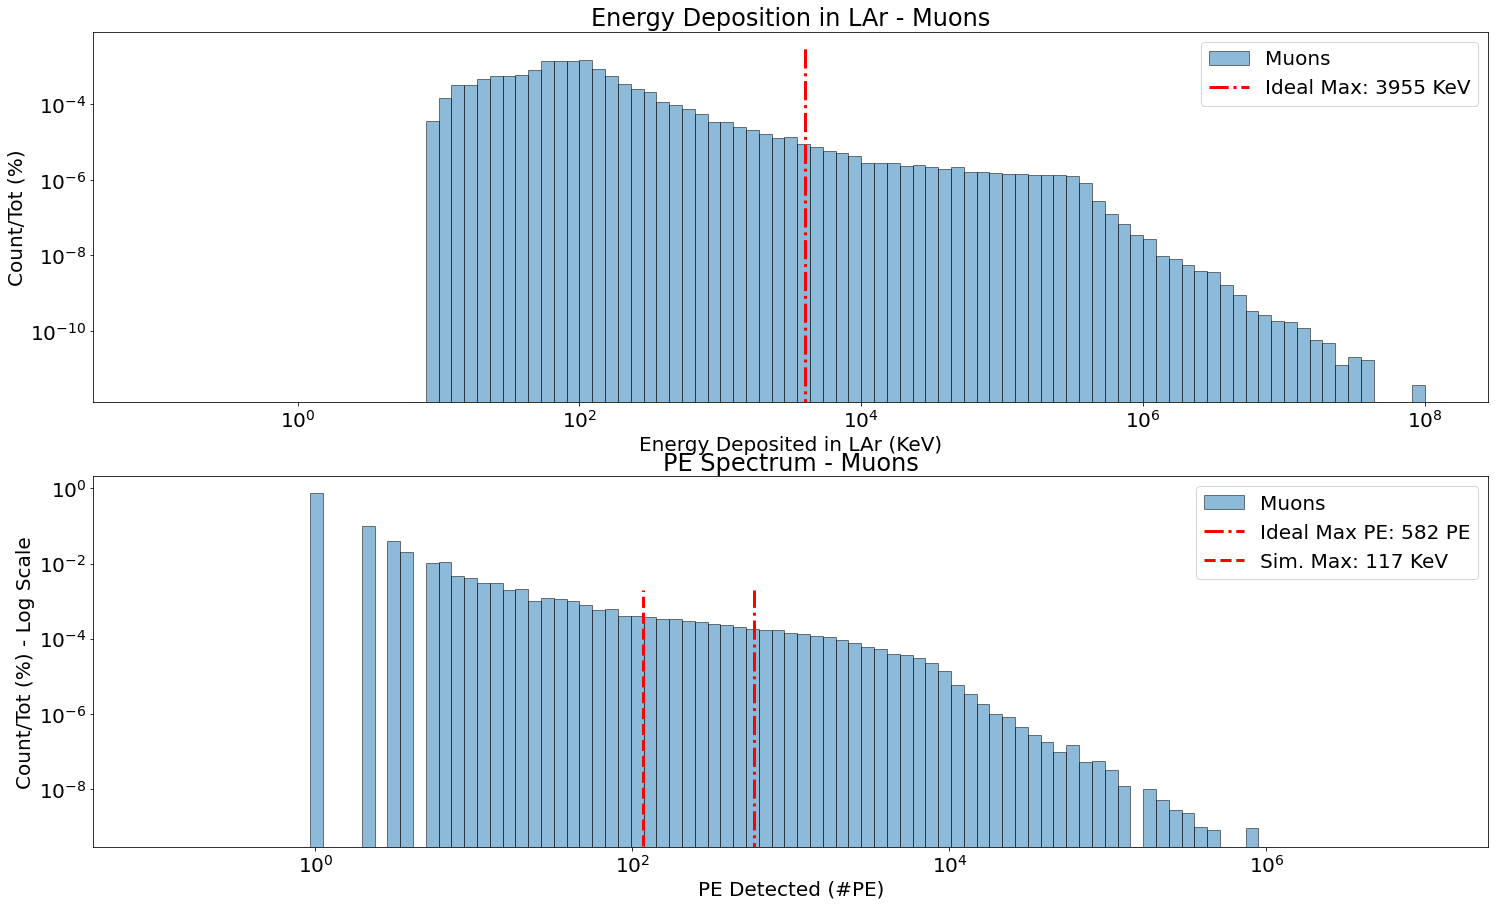

In [21]:
alpha=0.5
ar39_max_energy = 565
best_eff = 0.0092
quantum_eff = 0.4
op_yield = 40
ideal_max_edep = 7 * ar39_max_energy
ideal_max_npe = int(7 * ar39_max_energy * op_yield * best_eff * quantum_eff)

plt.subplot(2,1,1)
plt.title("Energy Deposition in LAr - Muons")
bins = np.logspace(-1, 8, 100)
plt.hist(df.energydeposition, bins=bins, label="Muons", density=True, edgecolor='k', alpha=alpha)
plt.vlines(x=ideal_max_edep, ymin=0, ymax=0.003, color='r', linestyles='dashdot', linewidth=3, label="Ideal Max: {} KeV".format(ideal_max_edep))
plt.xlabel("Energy Deposited in LAr (KeV)")
plt.ylabel("Count/Tot (%)")
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(2,1,2)
bins = np.logspace(-1, 7, 100)
plt.hist(df.pedetected, bins=bins, label="Muons", density=True, edgecolor='k', alpha=alpha)
plt.vlines(x=ideal_max_npe, ymin=0, ymax=0.002, color='r', linestyles='dashdot', linewidth=3, label="Ideal Max PE: {} PE".format(ideal_max_npe))
plt.vlines(x=117, ymin=0, ymax=0.002, color='r', linestyles='dashed', linewidth=3, label="Sim. Max: {} KeV".format(117))
plt.title("PE Spectrum - Muons")
plt.xlabel("PE Detected (#PE)")
plt.ylabel("Count/Tot (%) - Log Scale")
plt.yscale('log')
plt.legend()
plt.xscale('log')
plt.show()

In [22]:
n_muon_events = len(groupby_event_df.index.unique())
ideal_marginals_events = groupby_event_df[groupby_event_df.pedetected < 582].index.unique()
marginals_events = groupby_event_df[groupby_event_df.pedetected <= 117].index.unique()
print("[Info] Ideal Marginal muons: {}/{} => {:.2f} %".format(len(ideal_marginals_events), n_muon_events, len(ideal_marginals_events)/n_muon_events*100))
print("[Info] Simulated Marginal muons: {}/{} => {:.2f} %".format(len(marginals_events), n_muon_events, len(marginals_events)/n_muon_events*100))

[Info] Ideal Marginal muons: 6811/14491 => 47.00 %
[Info] Simulated Marginal muons: 5103/14491 => 35.21 %


In [7]:
marginal_df = df[df.eventnumber.isin(marginals_events)]
groupby_event_marginaldf = marginal_df.groupby("eventnumber").sum()

In [8]:
std_event_marginals = groupby_event_marginaldf.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_all = groupby_event_df.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)

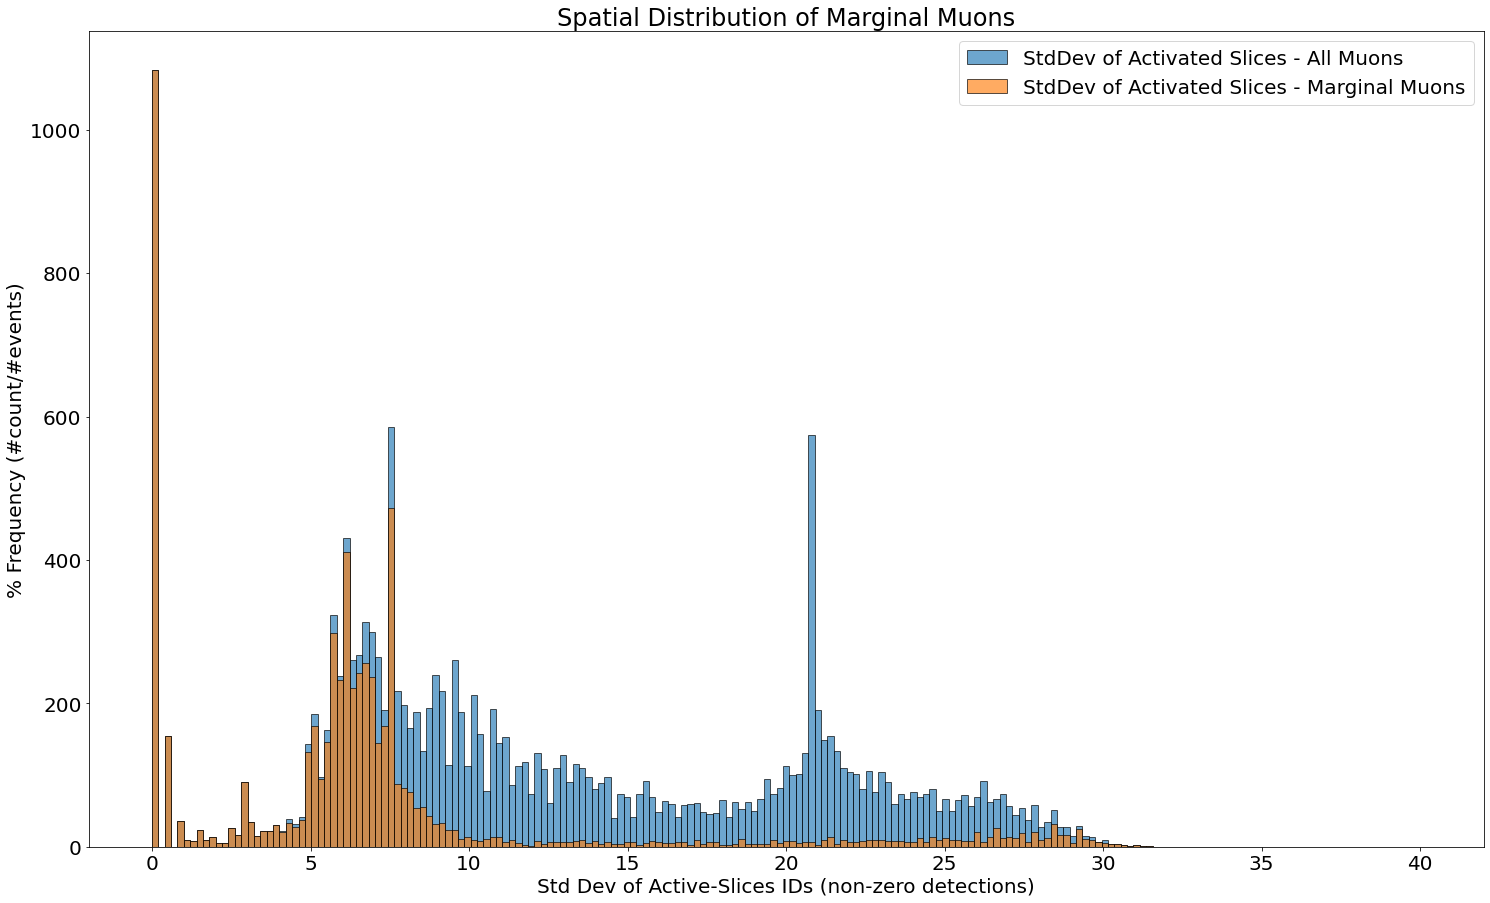

In [9]:
alpha=0.65
bins = np.linspace(0, 40, 200)
plt.title("Spatial Distribution of Marginal Muons")
plt.xlabel("Std Dev of Active-Slices IDs (non-zero detections)")
plt.ylabel("% Frequency (#count/#events)")
plt.hist(std_event_all, bins=bins, label="StdDev of Activated Slices - All Muons", density=False, edgecolor='k', alpha=alpha)
plt.hist(std_event_marginals, bins=bins, label="StdDev of Activated Slices - Marginal Muons", density=False, edgecolor='k', alpha=alpha)
#plt.text(15, 650, "Marginal Muons (<265 PE) are {} events.\n" \
#                  "Marginals have low std deviation (localized deposit).\n" \
#                  "General muons deposit larger amount of energy in a larger area,\nresulting in high std deviation.".format(len(marginals_events)))
plt.legend()
plt.show()

In [10]:
groupby_event_marginaldf[groupby_event_marginaldf.index.isin(std_event_marginals[std_event_marginals<5].index)].energydeposition.describe()

count     1849.000000
mean       599.272803
std       2318.826868
min          0.000006
25%          7.741700
50%         42.922300
75%        190.623000
max      30504.800000
Name: energydeposition, dtype: float64

In [11]:
dirin = os.path.join("..", "..", "Development", "Out")
prefix_7Ar39_files = "Ar39_Snapshots_T100_DT4_Grp7_Seed123456789_Part1.csv"
df7 = pd.read_csv(os.path.join(dirin, prefix_7Ar39_files), index_col=False, comment='#')
print("[Info] 7 Ar39: {} events".format(df7.eventnumber.nunique()))

[Info] 7 Ar39: 98852 events


In [12]:
groupby_event_df7 = df7.groupby("eventnumber").sum()
std_event_df7 = groupby_event_df7.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)

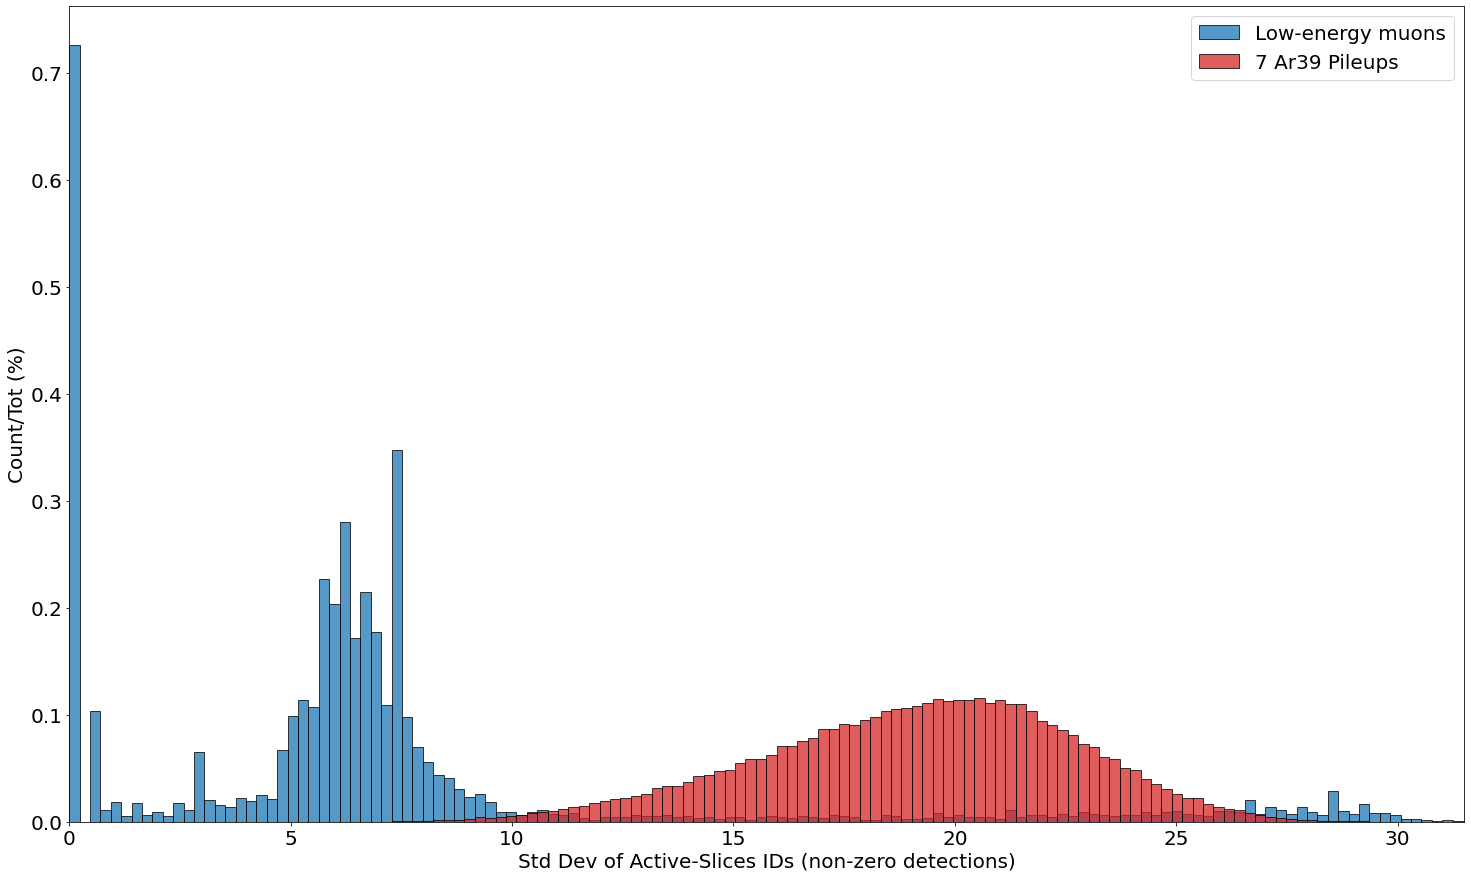

In [16]:
alpha=0.75
bins = np.linspace(0, 35, 150)
#plt.title("Spatial Distribution of Marginal Muons")
plt.xlabel("Std Dev of Active-Slices IDs (non-zero detections)")
plt.ylabel("Count/Tot (%)")
plt.hist(std_event_marginals, bins=bins, label="Low-energy muons", density=True, edgecolor='k', alpha=alpha)
plt.hist(std_event_df7, bins=bins, label="7 Ar39 Pileups", density=True, edgecolor='k', alpha=alpha, color='#d62728')
plt.legend()
plt.xlim(0,std_event_marginals.max())
plt.show()

6352